# Number Recognition

# Handwritten Digit Classification using ANN

Libraries

In [39]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [41]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [42]:
x_train.shape

(60000, 28, 28)

In [43]:
x_test.shape

(10000, 28, 28)

In [44]:
y_train.shape

(60000,)

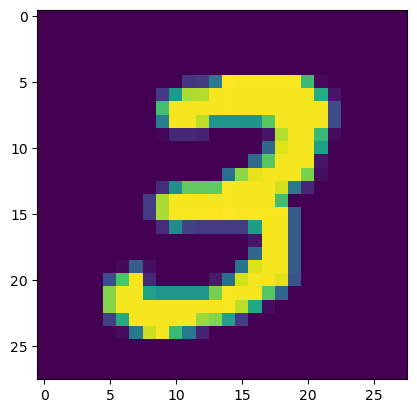

In [45]:
import matplotlib.pyplot as plt
plt.imshow(x_train[7])

In [46]:
x_train = x_train/255
x_test = x_test/255

In [47]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Building ANN

In [48]:
model = Sequential()

#Adding Layers by converting 1D by flatten
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Train the Model

In [50]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [51]:
history = model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 15s 9ms/step - loss: 0.2742 - accuracy: 0.9210 - val_loss: 0.1444 - val_accuracy: 0.9595
Epoch 2/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1159 - accuracy: 0.9656 - val_loss: 0.1099 - val_accuracy: 0.9663
Epoch 3/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0790 - accuracy: 0.9753 - val_loss: 0.1272 - val_accuracy: 0.9611
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0597 - accuracy: 0.9812 - val_loss: 0.1018 - val_accuracy: 0.9690
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0473 - accuracy: 0.9855 - val_loss: 0.0949 - val_accuracy: 0.9743
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0377 - accuracy: 0.9875 - val_loss: 0.1024 - val_accuracy: 0.9726
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0315 - accuracy: 0.9893 - val_loss: 0.0980 - val_ac

In [52]:
y_prob= model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [53]:
y_pred = y_prob.argmax(axis=1)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9777

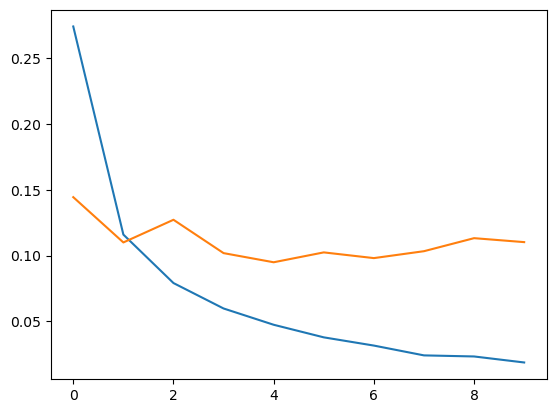

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

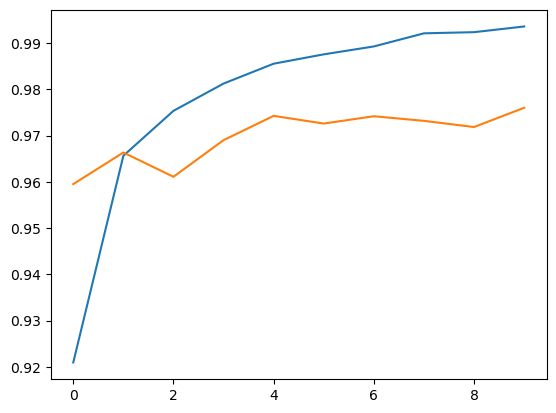

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

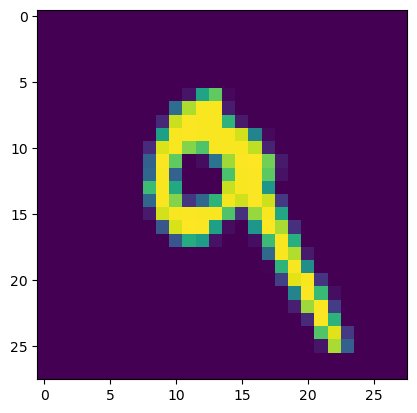

In [58]:
plt.imshow(x_test[7])

In [59]:
model.predict(x_test[7].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 41ms/step


array([9], dtype=int64)